# Cuda Notebook

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("*random.cali"))
tk.statsframe.dataframe["time"] = 1

In [3]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     ├─ 1.000 cudaMemcpy_device_to_host
│     └─ 1.000 cudaMemcpy_host_to_device
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [4]:
# Performance data
tk.dataframe


nid  \
node                                               profile           
{'name': 'main', 'type': 'function'}               190168239     1   
                                                   339214662     1   
                                                   774954219     1   
                                                   1356226014    1   
                                                   1997533829    1   
                                                   2187979912    1   
                                                   2204706642    1   
                                                   2250569979    1   
                                                   2708087571    1   
                                                   2900622682    1   
                                                   3268930986    1   
                                                   3547712491    1   
                                                   3613561865    1   
                                                   3838595838    1   
{'name': 'comm', 'type': 'function'}               190168239     3   
                                                   339214662     3   
                                                   774954219     3   
                                                   1356226014    3   
                                                   1997533829    3   
                                                   2187979912    3   
                                                   2204706642    3   
                                                   2250569979    3   
                                                   2708087571    3   
                                                   2900622682    3   
                                                   3268930986    3   
                                                   3547712491    3   
                                                   3613561865    3   
                                                   3838595838    3   
{'name': 'comm_large', 'type': 'function'}         190168239     4   
                                                   339214662     4   
                                                   774954219     4   
                                                   1356226014    4   
                                                   1997533829    4   
                                                   2187979912    4   
                                                   2204706642    4   
                                                   2250569979    4   
                                                   2708087571    4   
                                                   2900622682    4   
                                                   3268930986    4   
                                                   3547712491    4   
                                                   3613561865    4   
                                                   3838595838    4   
{'name': 'cudaMemcpy_device_to_host', 'type': '... 190168239     8   
                                                   339214662     8   
                                                   774954219     8   
                                                   1356226014    8   
                                                   1997533829    8   
                                                   2187979912    8   
                                                   2204706642    8   
                                                   2250569979    8   
                                                   2708087571    8   
                                                   2900622682    8   
                                                   3268930986    8   
                                                   3547712491    8   
                                                   3613561865    8   
                                                   3838595838    8   
{'n

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [5]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
190168239,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024-v4194304-random.cali,1700074749,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenSort, 1024, 4194304, random]",g,OddEvenSort,CUDA,float,4,4194304,Random,1,1024,4096,19,Handwritten
339214662,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t512-v16777216-random.cali,1700076030,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenSort, 512, 16777216, random]",g,OddEvenSort,CUDA,float,4,16777216,Random,1,512,32768,19,Handwritten
774954219,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t512-v262144-random.cali,1700075951,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenSort, 512, 262144, random]",g,OddEvenSort,CUDA,float,4,262144,Random,1,512,512,19,Handwritten
1356226014,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024-v16777216-random.cali,1700074785,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenSort, 1024, 16777216, random]",g,OddEvenSort,CUDA,float,4,16777216,Random,1,1024,16384,19,Handwritten
1997533829,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v4194304-random.cali,1700085418,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenSort, 256, 4194304, random]",g,OddEvenSort,CUDA,float,4,4194304,Random,1,256,16384,19,Handwritten
2187979912,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v1048576-random.cali,1700085358,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenSort, 256, 1048576, random]",g,OddEvenSort,CUDA,float,4,1048576,Random,1,256,4096,19,Handwritten
2204706642,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t512-v1048576-random.cali,1700075991,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenSort, 512, 1048576, random]",g,OddEvenSort,CUDA,float,4,1048576,Random,1,512,2048,19,Handwritten
2250569979,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t512-v4194304-random.cali,1700076023,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenSort, 512, 4194304, random]",g,OddEvenSort,CUDA,float,4,4194304,Random,1,512,8192,19,Handwritten
2708087571,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v262144-random.cali,1700085327,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenSort, 256, 262144, random]",g,OddEvenSort,CUDA,float,4,262144,Random,1,256,1024,19,Handwritten


In [6]:
gb = tk.groupby("InputSize")

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b02065da760>, 262144: <thicket.thicket.Thicket object at 0x2b02065b8a90>, 1048576: <thicket.thicket.Thicket object at 0x2b02066b6d30>, 4194304: <thicket.thicket.Thicket object at 0x2b02064b9a90>, 16777216: <thicket.thicket.Thicket object at 0x2b02065ca640>}


Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [8]:
ctk.dataframe

65536  \
                                                                 nid   
node                                               num_threads         
{'name': 'main', 'type': 'function'}               256             1   
                                                   512             1   
                                                   1024            1   
{'name': 'comm', 'type': 'function'}               256             3   
                                                   512             3   
                                                   1024            3   
{'name': 'comm_large', 'type': 'function'}         256             4   
                                                   512             4   
                                                   1024            4   
{'name': 'cudaMemcpy_device_to_host', 'type': '... 256             8   
                                                   512             8   
                                                   1024            8   
{'name': 'cudaMemcpy_host_to_device', 'type': '... 256             5   
                                                   512             5   
                                                   1024            5   
{'name': 'comp', 'type': 'function'}               256             6   
                                                   512             6   
                                                   1024            6   
{'name': 'comp_large', 'type': 'function'}         256             7   
                                                   512             7   
                                                   1024            7   
{'name': 'correctness_check', 'type': 'function'}  256             9   
                                                   512             9   
                                                   1024            9   
{'name': 'data_init', 'type': 'function'}          256             2   
                                                   512             2   
                                                   1024            2   

                                                                               \
                                                                 spot.channel   
node                                               num_threads                  
{'name': 'main', 'type': 'function'}               256          regionprofile   
                                                   512          regionprofile   
                                                   1024         regionprofile   
{'name': 'comm', 'type': 'function'}               256          regionprofile   
                                                   512          regionprofile   
                                                   1024         regionprofile   
{'name': 'comm_large', 'type': 'function'}         256          regionprofile   
                                                   512          regionprofile   
                                                   1024         regionprofile   
{'name': 'cudaMemcpy_device_to_host', 'type': '... 256          regionprofile   
                                                   512          regionprofile   
                                                   1024         regionprofile   
{'name': 'cudaMemcpy_host_to_device', 'type': '... 256          regionprofile   
                                                   512          regionprofile   
                                                   1024         regionprofile   
{'name': 'comp', 'type': 'function'}               256          regionprofile   
                                                   512          regionprofile   
                                                   1024         regionprofile   
{'name': 'comp_large', 'type': 'function'}         256          regionprofile   
                                                   512          regionprofile   
                                       

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid"), (16777216, "nid")], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (128, "Total time"), (1024, "Total time"), (8192, "Total time")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# Drop "time" label as it is redundant
#ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [10]:
ctk.dataframe

65536                   \
                                        spot.channel Min time/rank   
name                      num_threads                                
main                      256          regionprofile      0.773289   
                          512          regionprofile      0.768873   
                          1024         regionprofile      1.401946   
comm                      256          regionprofile      0.005023   
                          512          regionprofile      0.004913   
                          1024         regionprofile      0.000316   
comm_large                256          regionprofile      0.004964   
                          512          regionprofile      0.004855   
                          1024         regionprofile      0.000259   
cudaMemcpy_device_to_host 256          regionprofile      0.004812   
                          512          regionprofile      0.004721   
                          1024         regionprofile      0.000122   
cudaMemcpy_host_to_device 256          regionprofile      0.000119   
                          512          regionprofile      0.000100   
                          1024         regionprofile      0.000103   
comp                      256          regionprofile      0.365730   
                          512          regionprofile      0.424768   
                          1024         regionprofile      0.452853   
comp_large                256          regionprofile      0.365689   
                          512          regionprofile      0.424731   
                          1024         regionprofile      0.452820   
correctness_check         256          regionprofile      0.000187   
                          512          regionprofile      0.000184   
                          1024         regionprofile      0.000185   
data_init                 256          regionprofile      0.001441   
                          512          regionprofile      0.001426   
                          1024         regionprofile      0.001394   

                                                                              \
                                      Max time/rank Avg time/rank Total time   
name                      num_threads                                          
main                      256              0.773289      0.773289   0.773289   
                          512              0.768873      0.768873   0.768873   
                          1024             1.401946      1.401946   1.401946   
comm                      256              0.005023      0.005023   0.005023   
                          512              0.004913      0.004913   0.004913   
                          1024             0.000316      0.000316   0.000316   
comm_large                256              0.004964      0.004964   0.004964   
                          512              0.004855      0.004855   0.004855   
                          1024             0.000259      0.000259   0.000259   
cudaMemcpy_device_to_host 256              0.004812      0.004812   0.004812   
                          512              0.004721      0.004721   0.004721   
                          1024             0.000122      0.000122   0.000122   
cudaMemcpy_host_to_device 256              0.000119      0.000119   0.000119   
                          512              0.000100      0.000100   0.000100   
                          1024             0.000103      0.000103   0.000103   
comp                      256              0.365730      0.365730   0.365730   
                          512              0.424768      0.424768   0.424768   
                          1024             0.452853      0.452853   0.452853   
comp_large                256              0.365689      0.365689   0.365689   
                          512              0.424731      0.424731   0.424731   
                          1024             0.452820      0.452820   0.452820   
correctness_check      

In [11]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
print(function_names)
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
print(threads)
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

{'data_init', 'comp_large', 'cudaMemcpy_host_to_device', 'correctness_check', 'cudaMemcpy_device_to_host', 'comm', 'comp', 'main', 'comm_large'}
[256, 512, 1024]


# Plotting

In [19]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        df[0],
        marker='o',
    )
    
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    #plt.legend(["Total time for 262144"]) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [20]:
print(ctk.dataframe.loc["comm"])


                  65536                                               \
              spot.channel Min time/rank Max time/rank Avg time/rank   
num_threads                                                            
256          regionprofile      0.005023      0.005023      0.005023   
512          regionprofile      0.004913      0.004913      0.004913   
1024         regionprofile      0.000316      0.000316      0.000316   

                                                                              \
            Total time Avg GPU time/rank Min GPU time/rank Max GPU time/rank   
num_threads                                                                    
256           0.005023          0.000045          0.000045          0.000045   
512           0.004913          0.000046          0.000046          0.000046   
1024          0.000316          0.000047          0.000047          0.000047   

                                 262144                                \
            T

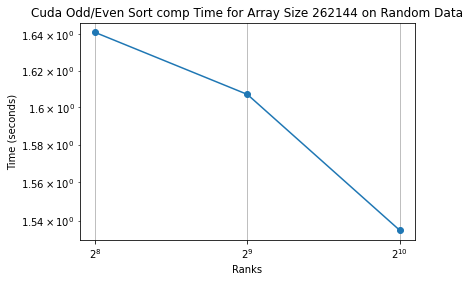

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Cuda Odd/Even Sort comp Time for Array Size 262144 on Random Data'}, xlabel='Ranks', ylabel='Time (seconds)'>)

In [21]:
name = "comp"
arraySize = 262144
plot_mpl(
    df=[
        ctk.dataframe.loc[name][arraySize]["Total time"],
        ], 
    title="Cuda Odd/Even Sort {} Time for Array Size {} on Random Data".format(name, arraySize),
    xlabel="Ranks",
    ylabel="Time (seconds)",
)

In [27]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        256,df[0],
        marker='o',
    )
    

    ax.plot(
        512,df[1],
        marker='o',
    )
    
    ax.plot(
        1024, df[2],
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(["65536 Values", "262144 Values", "1048576 Values", "4194304 Values", "16777216 Values"]) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks([256, 512, 1024])
    plt.show()
    return fig, ax

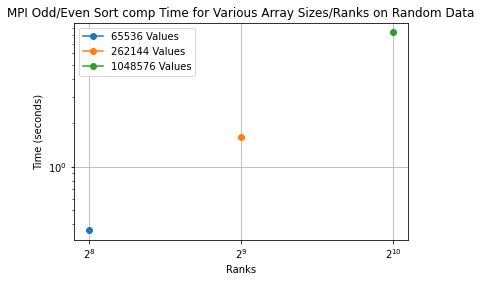

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'MPI Odd/Even Sort comp Time for Various Array Sizes/Ranks on Random Data'}, xlabel='Ranks', ylabel='Time (seconds)'>)

In [28]:
name = "comp"
plot_mpl(
    df=[ctk.dataframe.loc[name][65536]["Total time"][256], 
        ctk.dataframe.loc[name][262144]["Total time"][512],
        ctk.dataframe.loc[name][1048576]["Total time"][1024]],
    title="MPI Odd/Even Sort {} Time for Various Array Sizes/Ranks on Random Data".format(name),
    xlabel="Ranks",
    ylabel="Time (seconds)",
)